1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Realiza un análisis con regresión lineal multinominal teniendo como target la columna "duración". Es decir, averigua cuánto aumentan o disminuyen la duración cuando se aumenta una unidad los valores de las demás columnas.

- ¿Qué acierto tiene? (score)
- ¿Cuál es el RMSE? ¿Dirías que es un valor alto?
- Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?
- ¿Es la regresión un buen método para este dataset?

In [6]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataframe = pd.read_csv("../data/usuarios_win_mac_lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


# Visualizo los datos

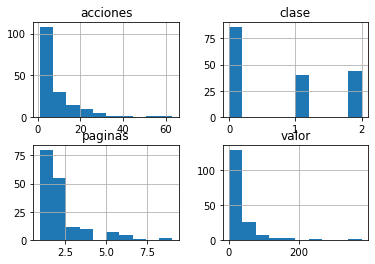

In [4]:
dataframe.drop(['duracion'],1).hist() # con drop estoy borrando la columna duración pero ademas con el 1 le estoy indicando la columna tb para que no me la grafique pq duración es el target
plt.show()

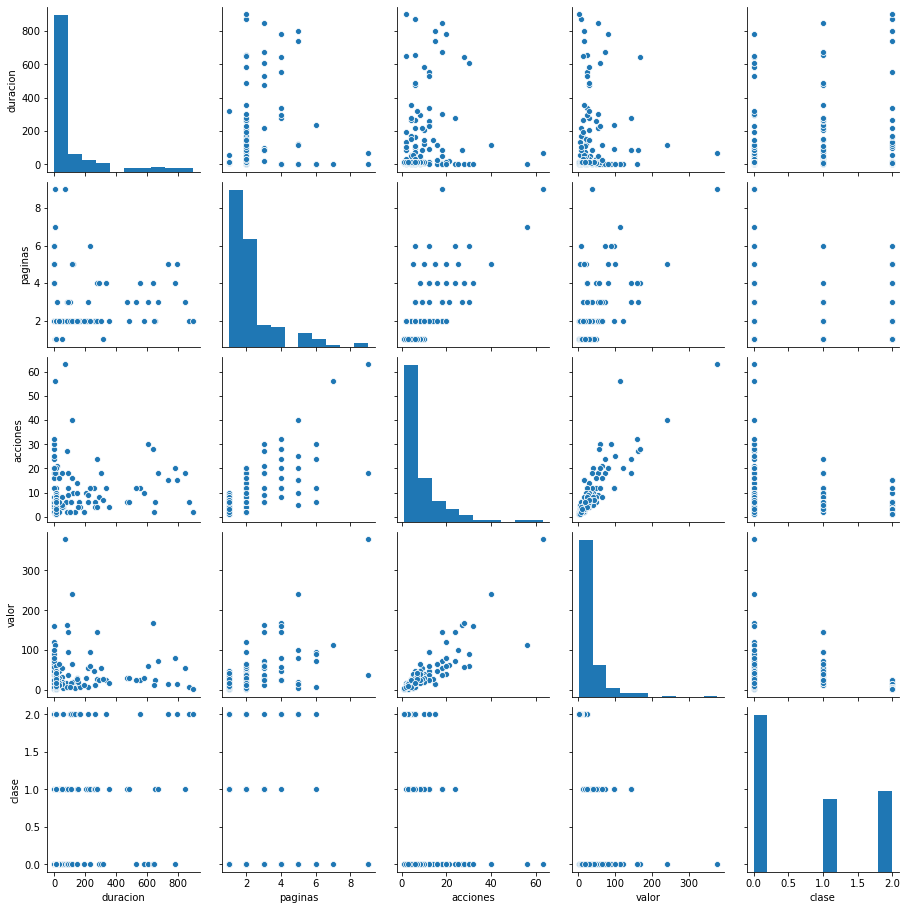

In [7]:
sns.pairplot(dataframe)

In [8]:
dataframe.columns

Index(['duracion', 'paginas', 'acciones', 'valor', 'clase'], dtype='object')

In [26]:
# Columnas de caracteristicas
X = dataframe[['paginas', 'acciones', 'valor', 'clase']]
X.shape

(170, 4)

In [27]:
# duracion es mi target, lo que estoy intentando predecir
y = dataframe['duracion']

In [28]:
#divido entre valores de entrenamiento y valores de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
# El modelo de entrenamiento solo se utiliza una vez

In [29]:
X_train.shape

(127, 4)

In [30]:
y_train.shape

(127,)

In [31]:
print(X_test.shape, y_test.shape)

(43, 4) (43,)


In [32]:
#importing the Linear Regression Algorithm, con esto creo el modelo o algoritmo que ejecutará la regresión
from sklearn.linear_model import LinearRegression

In [33]:
#creating LinearRegression Object
lm = LinearRegression(n_jobs=-1)  # -1 to use all processors

In [34]:
#Training the Data Model
lm.fit(X_train, y_train)
## El modelo de entrenamiento solo se utiliza una vez

LinearRegression(n_jobs=-1)

EVALUO EL MODELO

In [35]:
# Es la secante (la a en la formula) y solo hay una secante para todas
print(lm.intercept_)

2.715666761129228


In [36]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
paginas,55.318608
acciones,-1.100067
valor,-0.493587
clase,30.592124


Manteniendo fijas las demas variables un aumento de 1 unidad en paginas supone un incremeto de la duración de 55.31.
Manteniendo fijas las demas variables un aumento de 1 unidad en acciónes supone un descenso de la duración de -1.10.
Manteniendo fijas las demas variables un aumento de 1 unidad en valor supone un descenso de la duración de -0.49.

Manteniendo fijas las demas variables un aumento de 1 unidad en clases supone un incremeto de la duración de 30.59

PREDICCIONES DE NUESTRO MODELO

In [37]:
# Aqui estoy usando el 25% de los datos que reserve y que no se uso durante el entrenamiento y asi voy a poder comporarlo con lo obtenido durante el entrenamiento
predictions = lm.predict(X_test)

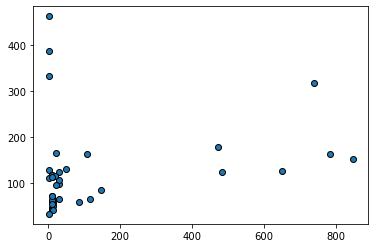

In [38]:
plt.scatter(y_test, predictions, edgecolor='black')
# Esto es para saber si nuestra prediccion tiene sentido
# Con el predictions que es lm.predict(X_test) estoy obteniendo un valor y´ aplicandole el mismo modelo de predicción que empleé con los valores X_test. 
# Puedo comparar los valores obtenidos con el modelo entrenado que son los y´con los valores reales que son los y_test. ES una manera de ver como de bien funciona el modelo.
#  Como veo en el grafico todos los valores se aproximan a una recta, es decir que están alrededor de ello por lo tanto podría decir que nuestro modelo es bueno.

# ¿Qué acierto tiene? (score)

In [40]:
from sklearn import metrics

In [44]:
lm.score(X_train, y_train)

0.12176555596074401

In [45]:
lm.score(X_test, y_test)

0.02545750721377249

Tienen un acierto (score) muy bajo

# ¿Cuál es el RMSE? ¿Dirías que es un valor alto?

In [46]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 226.61247805085387


In [ ]:
Es un valor alto

# Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?

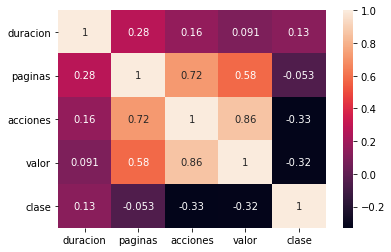

In [47]:
sns.heatmap(dataframe.corr(), annot = True)

Si, tiene coherencia con los resultados de la correlación.

La regresión no seria un buen método para este dataset